In [262]:
#%%writefile ../../src/features/compare_tide.py
import xarray as xr

from .grid_ttide import grid_ttide,plot_amp,plot_phase
from .compare_atg import compare_atg,print_rmse

def compare_constit(case_amp,case_phase,case_str,ref_amp,ref_phase,ref_str,atg_rmse,wct,comp,constit):
    print_rmse(atg_rmse,[case_amp.name[:2]])
    plot_amp(case_amp,case_str,ref_amp,ref_str,comp,constit,wct)
    plot_phase(case_phase,case_str,ref_phase,ref_str,comp,constit)
    
def compare_tide(zeta,rds,stime,constits,stations,res,tpxods,case_str):

    print('tidal analysis at atg stations ...')
    comp,rmse = compare_atg(zeta,rds.mask_rho,stime=stime,constit_list=constits,station_list=stations,print_flag=False)
    
    print('tidal analysis on whole grid ...')
    rds = grid_ttide(zeta,rds,res=res)
    wct = rds.h+rds.zice

    print('write out ATG and TPXO comparison for constituent: ')
    for constit in constits:
        
        ind = ['M2','S2','N2','K2','K1','O1','P1','Q1'].index(constit)
        
        compare_constit(rds[constit+'_amp'],rds[constit+'_phase'],case_str,
                        tpxods.tide_Eamp[ind],tpxods.tide_Ephase[ind],'tpxo',
                       rmse,wct,comp,constit)

Overwriting ../../src/features/compare_tide.py


tidal analysis at atg stations ...
stime =  2007-01-01 00:00:00  constits =  ['M2'] stations =  [20 21 22 23 24 25 26 27 28 29]


VBox(children=(HTML(value=''), IntProgress(value=0, max=10)))

587 419
66 764
146 676
482 649
418 660
278 673
0 571
488 827
289 409
252 449
tidal analysis on whole grid ...
setting up the new fields  ['amp', 'amp_err', 'phase', 'phase_err']  for  ['O1', 'M2']
applying t_tide to every  10 th cell ...


VBox(children=(HTML(value=''), IntProgress(value=0, max=10)))

interpolating intermediate cells and mask land
write out ATG and TPXO comparison for constituent: 
M2 RMSD: amp = 0.21 m    phase = 107.54 deg   complex amp = 0.26 m


/home/ubuntu/bigStick/anaconda3/envs/tidal_melting/lib/python3.6/site-packages/dask/local.py:271: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)


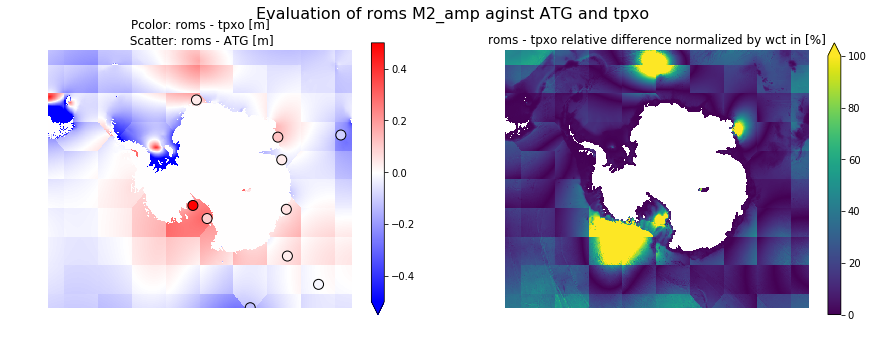

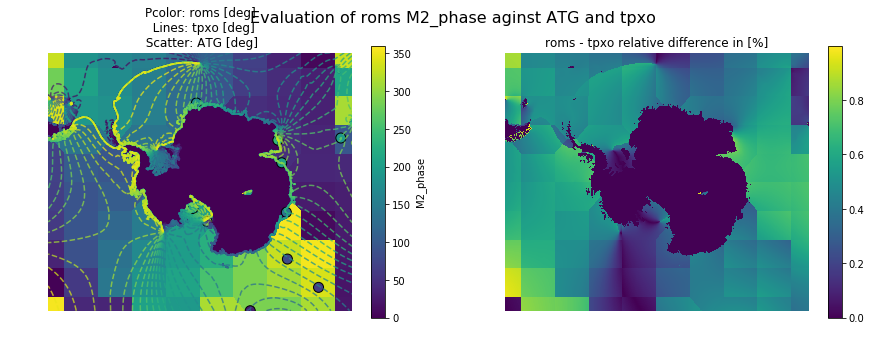

In [259]:
import os
import sys
import xarray as xr
import datetime

from dotenv import load_dotenv, find_dotenv

# find .env automagically by walking up directories until it's found
dotenv_path = find_dotenv()
load_dotenv(dotenv_path)
src_dir = os.environ.get('srcdir')
sys.path.append(src_dir)

# always reload modules marked with "%aimport"
#%load_ext autoreload
#%autoreload 1

%aimport features.compare_tide
from features.compare_tide import compare_tide

his = os.path.join(os.environ.get('rawdir'),'waom10_UV','ocean_his_0002.nc')
rds = xr.open_dataset(his)
zeta = rds.zeta.sel(ocean_time=slice('2000-1-14','2000-1-28'))

tpxo_path = os.path.join(os.environ.get('rawdir'),'gdata','waom10_data','waom10_tds_19840801.nc')
dsf = xr.open_mfdataset(tpxo_path)

compare_tide(zeta,rds,datetime.datetime(2007,1,1),['M2'],np.arange(20,30),10,dsf,'roms')